In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
% matplotlib inline

In [62]:
train_df = pd.read_csv('unimelb_training.csv', index_col=0)

# test_df = pd.read_csv('unimelb_test.csv', index_col=0)

from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(train_df, test_size=0.33, random_state=42)

print(train_df.shape)
print(test_df.shape)
train_df.head()

(5834, 251)
(2874, 251)


/opt/anaconda2/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (90,105,119,120,123,124,132,134,135,138,139,147,149,150,153,154,162,164,165,168,169,177,179,183,184,192,194,198,199,207,209,213,214,224,237,239,244) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Grant.Status,Sponsor.Code,Grant.Category.Code,Contract.Value.Band...see.note.A,Start.date,RFCD.Code.1,RFCD.Percentage.1,RFCD.Code.2,RFCD.Percentage.2,RFCD.Code.3,...,Faculty.No..15,With.PHD.15,No..of.Years.in.Uni.at.Time.of.Grant.15,Number.of.Successful.Grant.15,Number.of.Unsuccessful.Grant.15,A..15,A.15,B.15,C.15,Unnamed: 251
Grant.Application.ID,,,,,,,,,,,,,,,,,,,,,
45,0,89A,30B,NaN,19/11/05,320602.0,100.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3880,0,4D,10A,NaN,24/11/06,321003.0,100.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2949,0,4D,20C,NaN,4/09/06,321004.0,100.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8091,0,4D,10A,NaN,7/10/08,321004.0,100.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1188,1,34B,30C,A,1/12/05,270501.0,75.0,270701.0,25.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
print(train_df['Grant.Status'].value_counts(dropna=False))
test_df['Grant.Status'].value_counts(dropna=False)

0    3155
1    2679
Name: Grant.Status, dtype: int64


0    1561
1    1313
Name: Grant.Status, dtype: int64

In [65]:
categorical = train_df.columns.difference(train_df._get_numeric_data().columns)
train_df[categorical].dtypes.value_counts()

object    70
dtype: int64

In [66]:
from sklearn.preprocessing import LabelBinarizer, Imputer, LabelEncoder


# lb = MultiLabelBinarizer()
# lb = lb.fit(train_df[categorical].fillna(''))

# train_lb = pd.DataFrame(lb.transfrom(train_df[categorical]), index=train_df.index)
# train_lb.columns = ['lb_%d' for i in range(train_lb.shape[1])]

# train_df = pd.concat([train_df.drop(categorical), 
#                       train_lb], axis=1)

# test_lb = pd.DataFrame(lb.transfrom(test_df[categorical]), index=test_df.index)
# test_lb.columns = ['lb_%d' for i in range(test_lb.shape[1])]

# test_df = pd.concat([test_df.drop(categorical), 
#                       test_lb], axis=1)

train_df = train_df.drop(categorical, axis=1)
test_df = test_df.drop(categorical, axis=1)


In [113]:
X_train, y_train = train_df.drop('Grant.Status', axis=1), train_df['Grant.Status']
X_test, y_test = test_df.drop('Grant.Status', axis=1), test_df['Grant.Status']
X_test.shape, X_train.shape

((2874, 180), (5834, 180))

In [115]:
from sklearn.preprocessing import Imputer, StandardScaler

fillna = Imputer(strategy='mean')
X_train = fillna.fit_transform(X_train)
X_test = fillna.transform(X_test)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)


cols = train_df.drop('Grant.Status', axis=1).loc[:,~np.isnan(fillna.statistics_)].columns


In [85]:
X_test.shape, X_train.shape

((2874, 158), (5834, 158))

In [86]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score, RandomizedSearchCV


lda = LinearDiscriminantAnalysis(solver='svd', shrinkage=None, priors=None, n_components=None, 
                                 store_covariance=False, tol=0.0001)


cross_val_score(lda, X_train, y_train, cv=5, scoring='roc_auc')

/opt/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/opt/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/opt/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/opt/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/opt/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


array([ 0.78089889,  0.7691904 ,  0.74578967,  0.77255068,  0.75086571])

In [87]:
lda.fit(X_train, y_train)
lda.score(X_train, y_train)

/opt/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


0.73071648954405211

In [88]:
lda.score(X_test, y_test)

0.71155184411969385

/opt/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


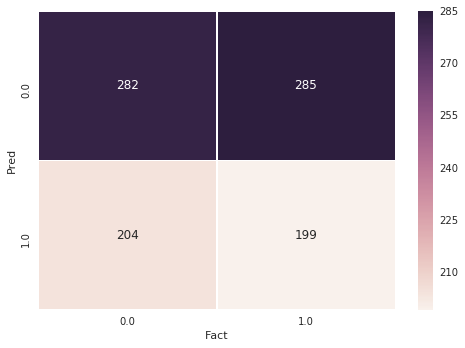

In [89]:
import seaborn as sns

crosst = pd.crosstab(pd.Series(lda.predict(X_test), name='Pred'), pd.Series(y_test, name='Fact'))
sns.heatmap(crosst, annot=True, fmt="d", linewidths=.5);

/opt/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


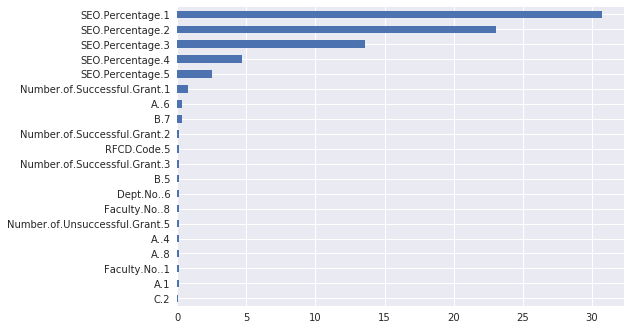

In [120]:
feat_imp = pd.Series(lda.coef_[0], index = cols).sort_values()[::-1]

feat_imp.head(20)[::-1].plot.barh()

In [123]:
[c for c in cols if 'aug' in c.lower()]

[]